In [1]:
#Importación de todas las libererías que voy a necesitar

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gestión de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None)

In [2]:
#Carga de los dataframes
df_flight_activity = pd.read_csv("./raw_data/Customer Flight Activity.csv", header=0)
df_loyalty_history = pd.read_csv("./raw_data/Customer Loyalty History.csv", header=0)

In [3]:
#Unión de los dos dataframes

#Voy a utilizar para unir los dataframes un left merge, utilizando el df_loyalty_history como df izquierdo
#ya que es el que contiene el listado de todos los clientes. Quiero que coja el listado de todos los clientes 
#y complete la tabla con la información de sus vuelos (contenida en df_flight_activity).

df_merged = df_loyalty_history.merge(df_flight_activity, how='left', on='Loyalty Number')

# ---------- FASE 1: EXPLORACIÓN Y LIMPIEZA ----------

In [4]:
#Comienzo la exploración del dataframe unido

df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [5]:
df_merged.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0
405623,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,12,0,0,0,0,0.0,0,0


In [6]:
df_merged.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
147375,538042,Canada,British Columbia,Vancouver,V6E 3D9,Female,High School or Below,45384.0,Married,Nova,4726.87,Standard,2015,12,NaN,NaN,2018,4,1,0,1,861,107.50,0,0
225830,624407,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,81729.0,Married,Nova,15470.60,Standard,2014,11,NaN,NaN,2018,3,13,0,13,2912,363.75,0,0
201623,585271,Canada,Saskatchewan,Regina,S6J 3G0,Female,Bachelor,64076.0,Married,Nova,8673.59,Standard,2017,10,NaN,NaN,2018,12,17,8,25,3725,372.00,0,0
227079,491643,Canada,Alberta,Peace River,T9O 2W2,Female,Bachelor,52220.0,Married,Nova,16464.37,Standard,2018,8,NaN,NaN,2018,4,0,0,0,0,0.00,0,0
163069,275849,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,54979.0,Married,Nova,5460.37,Standard,2012,5,NaN,NaN,2018,1,5,2,7,1400,140.00,0,0
232370,688319,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,89230.0,Divorced,Nova,21892.35,Standard,2012,5,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
125109,456887,Canada,British Columbia,Vancouver,V5R 1W3,Male,High School or Below,62283.0,Married,Nova,3508.57,Standard,2016,7,NaN,NaN,2018,10,0,0,0,0,0.00,0,0
134701,938719,Canada,Manitoba,Winnipeg,R3R 3T4,Female,Bachelor,75827.0,Married,Nova,3939.01,Standard,2018,10,NaN,NaN,2018,2,0,0,0,0,0.00,0,0
315458,707042,Canada,Ontario,Toronto,P1J 8T7,Female,High School or Below,45384.0,Married,Star,4726.87,Standard,2012,4,NaN,NaN,2017,4,8,0,8,3208,320.00,0,0
298178,677068,Canada,Quebec,Montreal,H2T 9K8,Female,College,NaN,Single,Star,3486.70,Standard,2018,5,NaN,NaN,2017,4,2,2,4,1832,183.00,0,0


In [7]:
df_merged.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [9]:
df_merged.shape

(405624, 25)

In [10]:
df_merged.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [11]:
# Veo que los tipos de datos de algunas columnas no son los adecuados, en concreto: 
# - Enrollment Year y Enrollment Month
# - Cancellation Year y Cancellation Month
# - Year y Month
# - Points Accumulated

In [12]:
# Year y Month

df_merged.insert(18, 'Flight Date', pd.to_datetime(df_merged[['Year', 'Month']].assign(Day=1)))
df_merged.drop(['Year', 'Month'], axis=1, inplace=True, errors='raise')

In [13]:
# Points Accumulated

df_merged['Points Accumulated']=df_merged['Points Accumulated'].astype(int)

In [14]:
# Enrollment Year y Enrollment Month

df_merged["Enrollment Date"] = df_merged["Enrollment Year"].astype(str) + "-" + df_merged["Enrollment Month"].astype(str).str.zfill(2)
df_merged['Enrollment Date'] = pd.to_datetime(df_merged['Enrollment Date'])

df_merged.drop(['Enrollment Year', 'Enrollment Month'], axis=1, inplace=True, errors='raise')

In [15]:
#Cancellation Year y Cancellation Month - no puedo cambiar el tipo de dato ya que contiene nulos. 
#Voy primero a cambiar los nulos y después cambiaré el tipo de dato de estas columnas.

In [16]:
#Reviso si el dataframe contiene nulos y  veo que hay tres columnas que contienen nulos: 
# - Salary
# - Cancellation Year y Cancellation Month

df_merged.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Cancellation Year              355560
Cancellation Month             355560
Flight Date                         0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment Date                     0
dtype: int64

In [17]:
# Voy a ver qué porcentaje de nulos hay en mi df

porc_null=(df_merged.isnull().sum()/df_merged.shape[0]*100)
df_null = pd.DataFrame(porc_null, columns=['% nulls'])
df_null[df_null['% nulls'] > 0]

,% nulls
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535


In [18]:
# Cancellation Year y Cancellation Month

# En este caso, voy a mantener los registros cuya fecha de cancelación es nula, puesto que significa que son clientes que no han cancelado su suscripción y que siguen activos.
# Si los eliminase, perdería información de muchos clientes. 


# Dado que tienen tipo de dato float, primero voy a convertirlos a enteros, manejando nulos correctamente
df_merged["Cancellation Year"] = pd.to_numeric(df_merged["Cancellation Year"], errors="coerce")
df_merged["Cancellation Month"] = pd.to_numeric(df_merged["Cancellation Month"], errors="coerce")

# Después, voy a crear la columna "Cancellation Date", manteniendo los nulos cuando falte algún valor
df_merged["Cancellation Date"] = pd.to_datetime(df_merged["Cancellation Year"].astype('Int64').astype(str) + "-" +
    df_merged["Cancellation Month"].astype('Int64').astype(str) + "-01", errors="coerce")

# Por último elimino las dos columnas separadas de año y mes
df_merged.drop(['Cancellation Year', 'Cancellation Month'], axis=1, inplace=True, errors='raise')

C:\Users\elisa\AppData\Local\Temp\ipykernel_11612\2655699665.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged["Cancellation Date"] = pd.to_datetime(df_merged["Cancellation Year"].astype('Int64').astype(str) + "-" +


In [19]:
# Salary
# - Es una columna numérica
# - Tiene un alto porcentaje de nulos
# - Es importante para nuestro análisis posterior.
# - No tiene una distribución uniforme
# - Tiene valores atípicos (negativos)

#Utilizaré técnicas de imputación avanzada para gestionar los nulos de esta columna.
# 1º voy a ver los valores atípicos, y los convertiré en nulos - no puede haber valores negativos en este atributo. 
# 2º voy a utilizar técnicas de imputación avanzada para gestionar los nulos. 

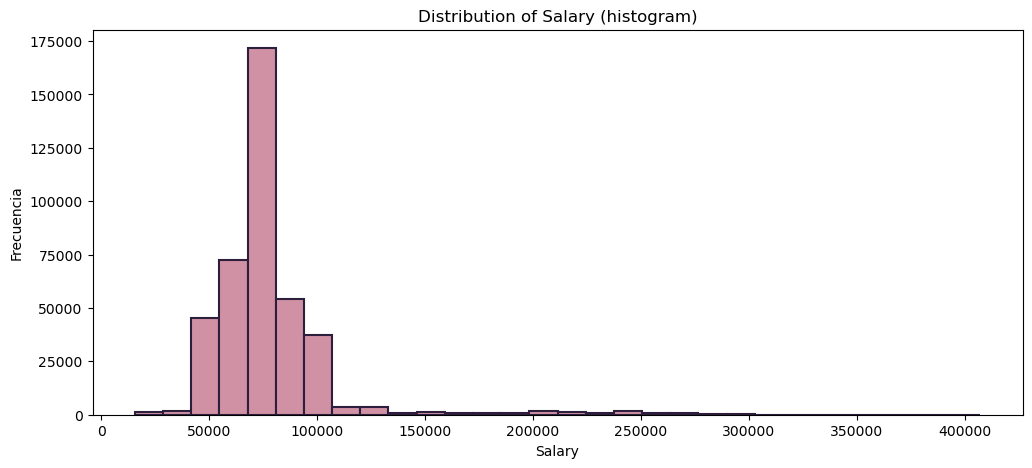

In [207]:
plt.figure(figsize=(12, 5))
color_cube = sns.cubehelix_palette(12, light=0.7)

plt.hist(df_merged['Salary'].dropna(), bins=30, color=color_cube[1], edgecolor=color_cube[11], linewidth=1.5)
plt.title(f'Distribution of Salary (histogram)')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')
plt.show()

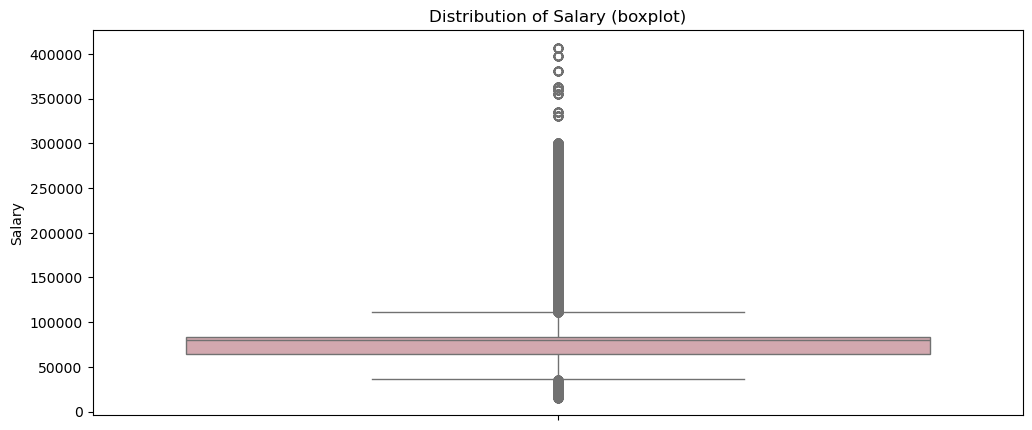

In [209]:
plt.figure(figsize=(12, 5))

sns.boxplot(y='Salary', data=df_merged, color=color_cube[0])

plt.title('Distribution of Salary (boxplot)')
plt.ylabel('Salary')
plt.show()

In [22]:
negative_salary = df_merged['Salary'] < 0
df_negative_salary = df_merged[negative_salary]
df_negative_salary['Loyalty Number'].unique()

#Veo que hay 20 identificadores de clientes que tienen valores negativos en Salario

array([542976, 959977, 232755, 525245, 603070, 491242, 115505, 430398,
       152016, 194065, 212128, 790475, 366599, 436087, 364596, 239955,
       347013, 729561, 734647, 906428], dtype=int64)

In [23]:
#Primero voy a sustituir los valores negativos en la columna Salary por nulos. 
#Para ello, creo una función y después la aplico al df. 

def replace_negative_salary(salary):
    if(salary) < 0:
        return np.nan
    return salary

In [24]:
df_merged['Salary'] = df_merged['Salary'].apply(replace_negative_salary)

In [25]:
#Compruebo que ya no hay valores negativos en Salary

df_merged['Salary'].min()

15609.0

In [26]:
#Dado que el porcentaje de nulos es alto, voy a utilizar técnicas de imputacion avanzada para tratar los nulos de la columna Salary. 
#Utilizo la técnica Iterative Imputer dado que es más efectiva en grandes volúmenes de datos. 

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_merged['Salary'] = imputer_iter.fit_transform(df_merged[['Salary']])

In [27]:
#Compruebo que ya no hay valores nullos en Salary

df_merged['Salary'].isnull().sum()

0

In [28]:
#Reviso si el dataframe contiene registros duplicados que haya que tratar y veo que tiene 1864 registros duplicados.

df_merged.duplicated().sum()

1864

In [29]:
#Reviso cuáles son los registros duplicados para ver si efectivamente son duplicados, antes de eliminarlos. 
#Veo que sí son registros que contienen información exacta (mismo Loyalty Number y misma fecha) por lo que procedo a eliminarlos. 

duplicated = df_merged[df_merged.duplicated(keep=False)]
duplicated

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Flight Date,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Date,Cancellation Date
120,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2017-01-01,0,0,0,0,0,0,0,2012-05-01,NaT
121,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2017-01-01,0,0,0,0,0,0,0,2012-05-01,NaT
159,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2018-08-01,0,0,0,0,0,0,0,2012-05-01,NaT
160,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2018-08-01,0,0,0,0,0,0,0,2012-05-01,NaT
164,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2018-11-01,0,0,0,0,0,0,0,2012-05-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381803,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2018-06-01,0,0,0,0,0,0,0,2014-10-01,NaT
381804,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2018-07-01,0,0,0,0,0,0,0,2014-10-01,NaT
381805,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2018-07-01,0,0,0,0,0,0,0,2014-10-01,NaT
381806,373638,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,92501.0,Divorced,Star,11073.11,Standard,2018-08-01,0,0,0,0,0,0,0,2014-10-01,NaT


In [30]:
df_merged=df_merged.drop_duplicates()

In [31]:
#Reviso que se han eliminado correctamente todos los duplicados. 

df_merged.duplicated().sum()

0

In [32]:
# Veo las estadísticas básicas del dataframe

df_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
Loyalty Number,403760.0,549875.383713,100018.0,326699.0,550598.0,772152.0,999986.0,258961.514684
Salary,403760.0,79444.017477,15609.0,64001.0,79451.016028,82940.0,407228.0,29965.369809
CLV,403760.0,7990.864857,1898.01,3981.78,5776.34,8937.12,83325.38,6863.31716
Flight Date,403760,2017-12-16 04:03:18.082028800,2017-01-01 00:00:00,2017-07-01 00:00:00,2018-01-01 00:00:00,2018-07-01 00:00:00,2018-12-01 00:00:00,NaN
Flights Booked,403760.0,4.13405,0.0,0.0,1.0,8.0,21.0,5.230064
Flights with Companions,403760.0,1.036569,0.0,0.0,0.0,1.0,11.0,2.080472
Total Flights,403760.0,5.170619,0.0,0.0,1.0,10.0,32.0,6.526858
Distance,403760.0,1214.460979,0.0,0.0,525.0,2342.0,6293.0,1434.098521
Points Accumulated,403760.0,124.237924,0.0,0.0,53.0,240.0,676.0,146.675448
Points Redeemed,403760.0,30.838587,0.0,0.0,0.0,0.0,876.0,125.758002


In [33]:
#Insights relevantes de las estadísticas básicas: 
# - LOYALTY NUMBER: es un número de identificador de cada cliente. No tiene sentido ver sus estadísticas
# - FLIGHT DATE: el rango de fechas del df es desde 01/01/2017 al 01/12/2018 -> estamos viendo datos de unos dos años. Tampoco tiene sentido 
# ver estadísticas de una fecha (salvo el percentil 50% que indica que los datos estan muy igualados entre los dos años)
# - FLIGHTS BOOKED: la media de vuelos reservados por cliente es de 4.13, sin embargo existe una gran dispersión en este dato(5.23), 
# lo que significa que hay una gran variabilidad en la cantidad de vuelos que reserva cada cliente. 
# La mayoría de los clientes han reservado sólo 1 vuelo (percentil 50%) y hasta el 75% de todos los clientes no han reservado más de 8 vuelos. 
# Sin embargo vemos que hay algun cliente que ha reservado hasta 21 vuelos. 
# El 25% de los clientes no han reservado ningún vuelo
# El 50% de los clientes ha reservado 1 vuelo o menos
# El 75% de los clientes ha reservado 8 vuelos o menos (sólo un 25% ha reservado más de 8 vuelos) 
# Un pequeño grupo de clientes ha reservado más de 21 vuelos, lo que los hace clientes frecuentes.
# - FLIGHTS WITH COMPANIONS: la media de vuelos con acompañantes es 1.03, pero sin embargo hay un rango máximo de 11. Significa que la mayoría de clientes (hasta el 75%)
# vuelan con 1 o menos acompañantes, pero hay un grupo reducido que vuela con muchos acompañantes (hasta 11). 
# - TOTAL FLIGHTS: el promedio de vuelos es de 5, sin embargo hay mucha dispersión. Solo un 25% de los clientes han hecho más de 10 vuelos.
# La mayoría de los clientes viajan poco, pero hay un grupo leal que viaja con alta frecuencia.
# - DISTANCE: existe una gran dispersión. Hay un grupo significativo (25%) que no ha volado aún, pero también hay un pequeño porcentaje con grandes recorridos (más de 6000km). 
# - POINTS ACCUMULATED: La acumulación de puntos es desigual. Algunos clientes han acumulado una gran cantidad, pero la mayoría tiene pocos puntos o ninguno.
# - Points REDEEMED: el 75%de la población no ha canjeado ningún punto 



#Pricipales insights de estas estadísticas básicas: 
# - LOYALTY NUMBER: es un identificador de cliente, no tiene sentido ver estadísticas. 
# - SALARY: el promedio de salario son 79,429, pero con una gran desviación estandar (29,986). Significa que hay clientes con un
# rango muy amplio de salario (desde 15k a 407k). Media y mediana coinciden.
# - CLV: hay una desviación muy grande en el valor que cada cliente aporta a la empresa. El 75% de los clientes tienen un CLV menor de 9k, 
# pro hay algunos clientes que llegan hasta un CLV de 83k. Hay un grupo pequeño de clientes de muy alto valor. 
# - ENROLLMENT DATE: desde 2012 hasta 2018, estando la mediana en 2015, distribución uniforme. 
# - CANCELLATION DATE: solo 2067 clientes de un total de 16737 tienen fecha de cancelación (el 12%, ver tabla abajo). Aunque han ido aumentando en el tiempo. 

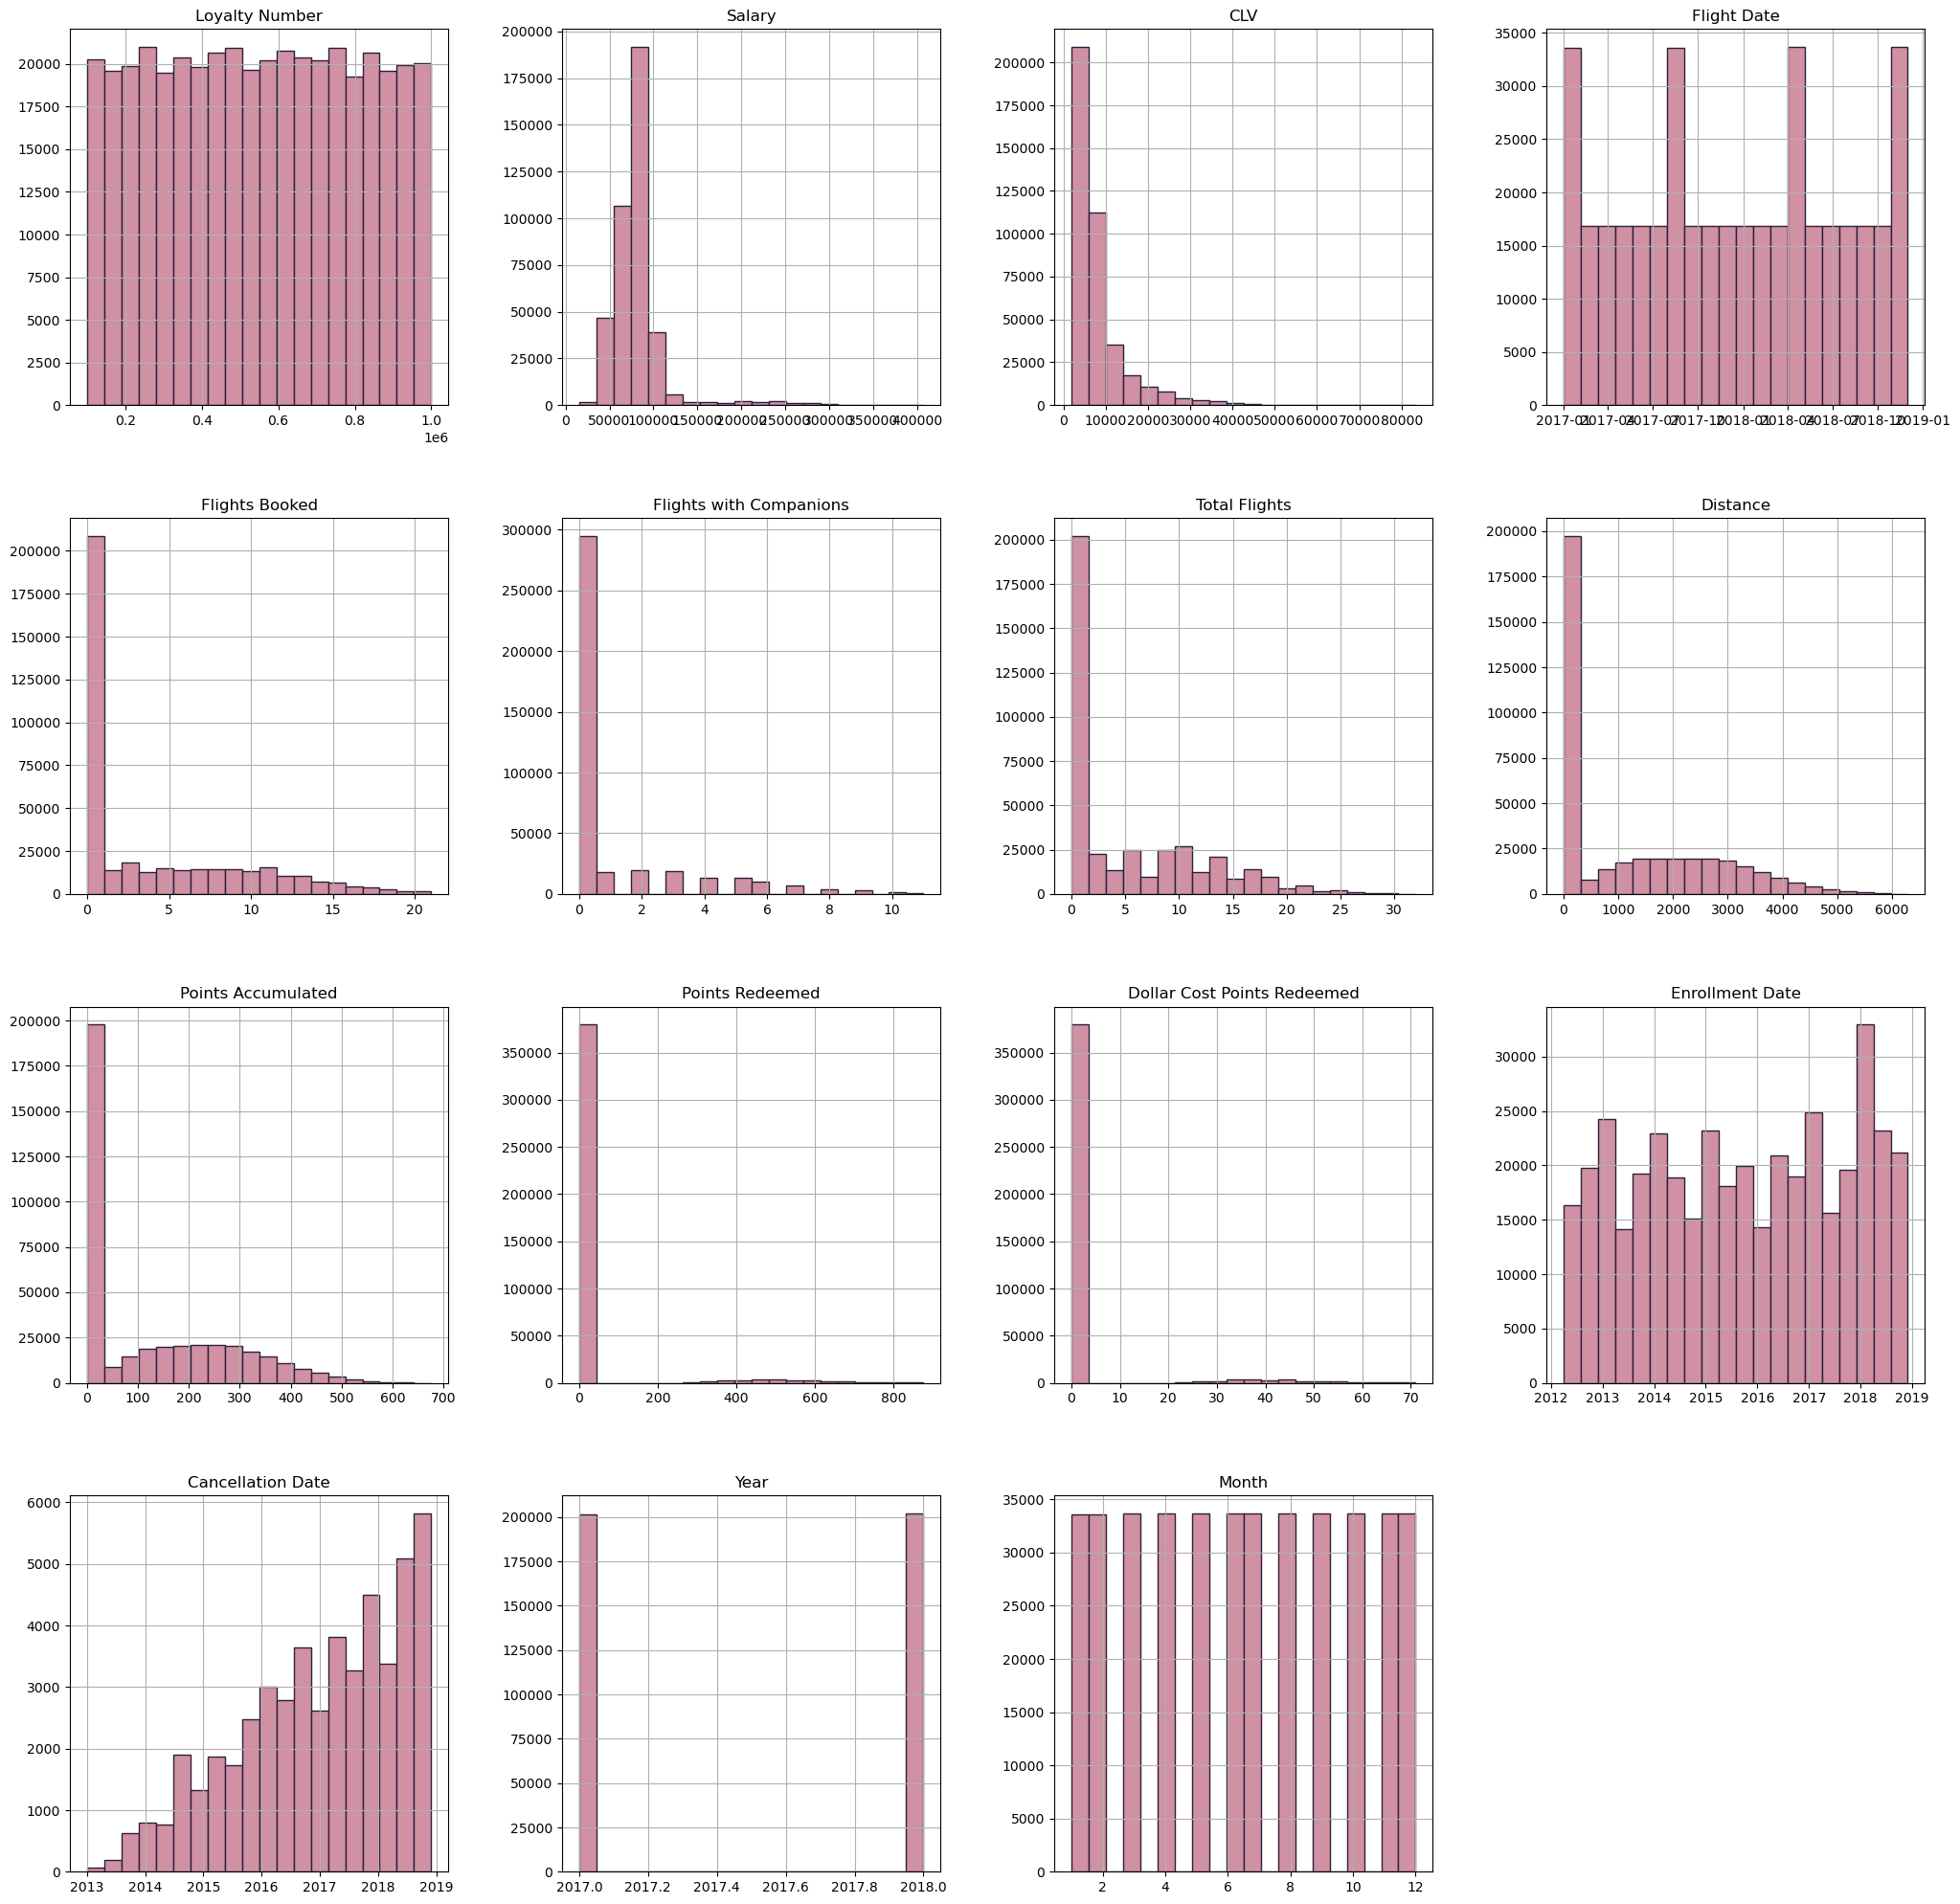

In [187]:
color_cube = sns.cubehelix_palette(12, light=0.7) 

df_merged.hist(bins=20, figsize=(25,25), color=color_cube[1], edgecolor=color_cube[11])
plt.show()

In [35]:
df_merged['Cancellation Date'].notnull().mean() * 100


12.29690905488409

In [36]:
df_merged.describe(include='object').T


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [37]:
#Insights: 
# Todos los clientes son de Canadá
# Hay clientes de 11 provincias, aunque la que tiene más clientes es Ontario (moda, con un 32%)
# Hay clientes de 29 ciudades aunque hay 3 que predominan: Toronto (20%), Vancouver (15.4%) y Montreal (15.3%)
# La distribución entre clientes femeninos y masculinos es practicamente igual. 
# Más de la mitad de los clientes están casados y tienen nivel de educación licenciatura. 
# Más de la mitad de los clientes tienen la tarjeta de lealtad Star y practicamente la totalidad de los clientes (94%) estan incritos en la modalidad Standard. 

In [38]:
df_merged['Province'].mode()[0]

'Ontario'

In [39]:
df_category = df_merged.select_dtypes(include='object')

In [40]:
columns_cat = df_category.columns

In [41]:
for col in columns_cat:
    print(f"\n-------ESTAMOS ANALIZANDO LA COLUMNA: '{col.upper()}'------")
    print(f"Sus valores unicos son: {df_category[col].unique()}\n")
    print(f"Las frecuencias de los valores únicos son: {df_category[col].value_counts()}\n")
    print(f"Su distribución porcentual es: {df_merged[col].value_counts(normalize=True) * 100}\n")



-------ESTAMOS ANALIZANDO LA COLUMNA: 'COUNTRY'------
Sus valores unicos son: ['Canada']

Las frecuencias de los valores únicos son: Country
Canada    403760
Name: count, dtype: int64

Su distribución porcentual es: Country
Canada    100.0
Name: proportion, dtype: float64


-------ESTAMOS ANALIZANDO LA COLUMNA: 'PROVINCE'------
Sus valores unicos son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

Las frecuencias de los valores únicos son: Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64

Su distribución porcentual es: Province
Ontario                 32.261

In [42]:
#Veo que toda la información hace referencia a clientes del país Canadá, por lo tanto es irrelevante que tenga una columna con este dato, 
#por lo que la elimino. 

df_loyalty_history.drop(['Country'], axis=1, inplace=True,errors='raise')

In [43]:
df_merged.to_csv("./clean_data/Merged_Customer_Loyalty_final.csv", index=False)

# ---------- FASE 2: VISUALIZACIÓN ----------

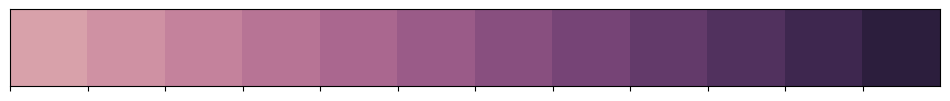

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

color_cube = sns.cubehelix_palette(12, light=0.7) 

sns.palplot(color_cube)
plt.show()

# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?

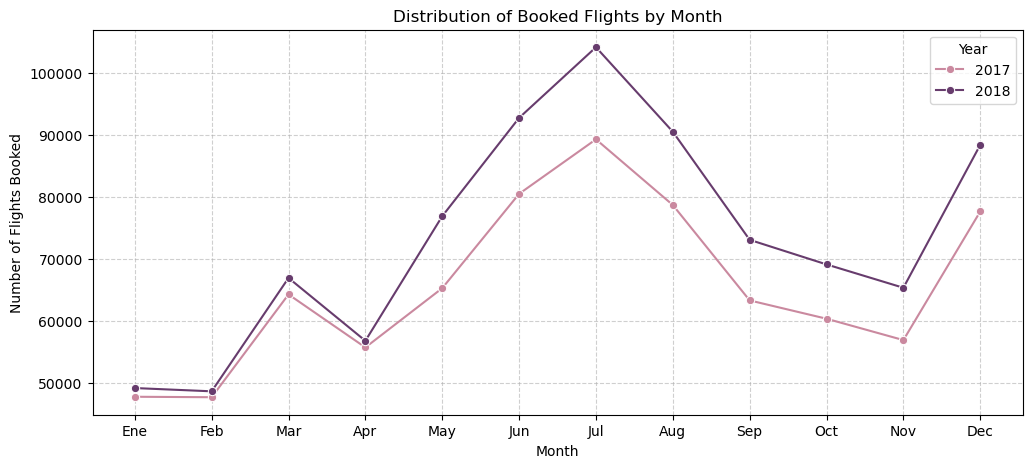

In [157]:
#Voy a utilizar un gráfico de lineas para ver cómo ha evolucionado la reserva de vuelos por mes y por año

# Primero extraigo de la columna Flight Date el año y el mes
df_merged["Year"] = df_merged["Flight Date"].dt.year
df_merged["Month"] = df_merged["Flight Date"].dt.month

# Agrupo mi nuevo dataframe por Año y por Mes
df_monthly_flights = df_merged.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

# Hago un gráfico de lineas para visualizar la evolución
plt.figure(figsize=(12, 5))

sns.lineplot(data=df_monthly_flights, x="Month", y="Flights Booked", hue="Year", marker="o", palette=[color_cube[1], color_cube[5]])

plt.title("Distribution of Booked Flights by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights Booked")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Year")

plt.show()

In [45]:
#CONCLUSIÓN:

# Podemos ver que el comportamiento de los clientes ha seguido el mismo patrón en los dos años en cuanto 
#al número de vuelos reservados. 
#- El número total de vuelos reservados en 2018 ha sido mayor con respecto al 2017, pero el patrón ha sido el mismo 
#- Hay un pico de reservas en los meses de verano, desde junio a agosto y también en diciembre. 
#- Los meses en los que menos vuelos se reservan son enero y febrero (invierno,época post navidad...)

# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


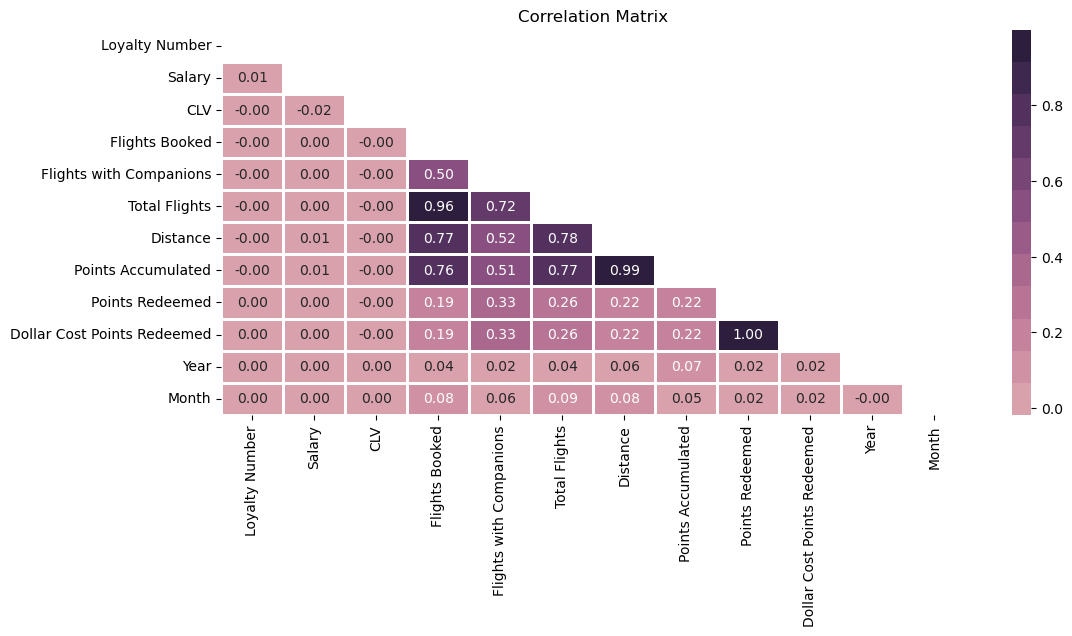

In [206]:
#Voy a utilizar una matriz de correlación y un mapa de calor para ver la relación entre las dos variables

correlation_matrix = df_merged.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap=color_cube, fmt='.2f', linewidth=1, mask=mask)

plt.title("Correlation Matrix")

plt.show()

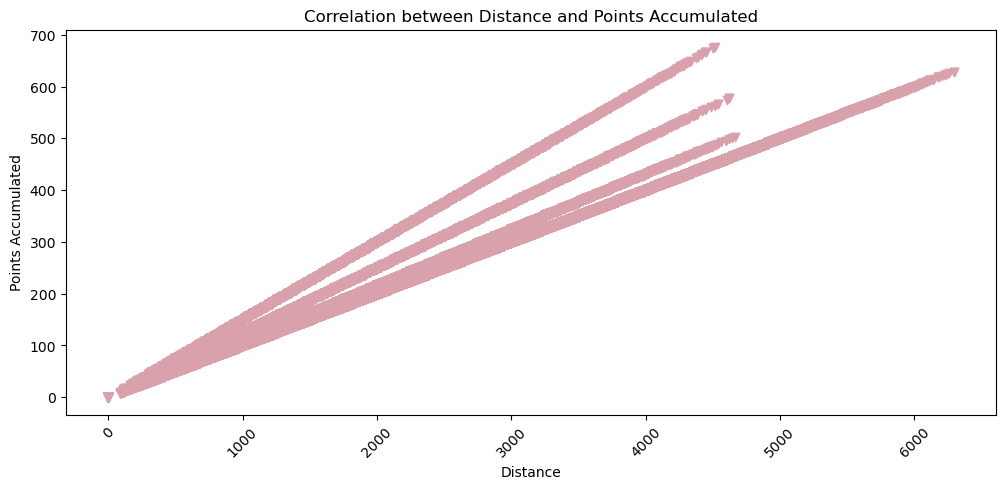

In [161]:
# Con el scatterplot también vemos que estas dos variables tienen una relación directa muy fuerte.

plt.figure(figsize=(12, 5))

colors = sns.color_palette("pastel")
plt.scatter(df_merged['Distance'], 
            df_merged['Points Accumulated'],
            color=color_cube[0], 
            marker='v')
plt.xlabel("Distance")
plt.ylabel("Points Accumulated")
plt.title("Correlation between Distance and Points Accumulated")
plt.xticks(rotation=45)
plt.show()

In [48]:
#CONCLUSIÓN: 

# Existe una relación directa entre la distancia recorrida y el número de puntos acumulados por cada cliente.
# La correlación es de 0,99, lo que significa es una relación muy fuerte. 
# Tiene sentido que quien más viaje, más puntos de fidelidad reciba.

# 3. ¿Cuál es la distribución de los clientes por provincia o estado? 


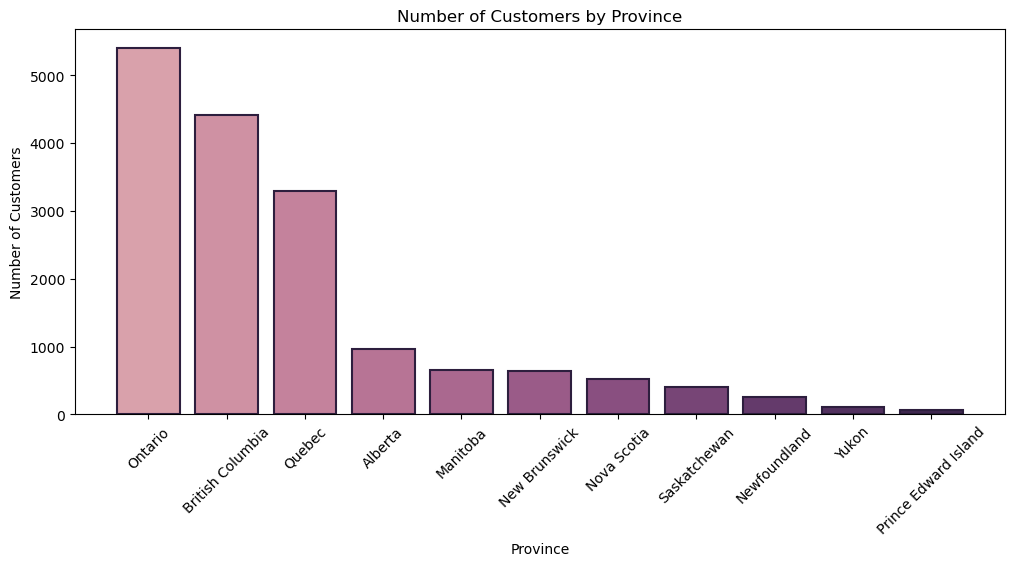

In [203]:
# En este caso, no voy a utilizar el df_merged si no el df_loyalty_history puesto que contiene información de clientes únicos, sin impactar el número de vuelos que haya hecho.

df_customer_by_province = df_loyalty_history.groupby('Province')['Loyalty Number'].count().reset_index().sort_values(by = 'Loyalty Number', ascending = False)
df_customer_by_province

plt.figure(figsize=(12, 5))
plt.bar(x=df_customer_by_province['Province'], height=df_customer_by_province['Loyalty Number'], color=color_cube, edgecolor=color_cube[11], linewidth=1.5)
plt.xlabel('Province')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Province')
plt.xticks(rotation=45)

plt.show()

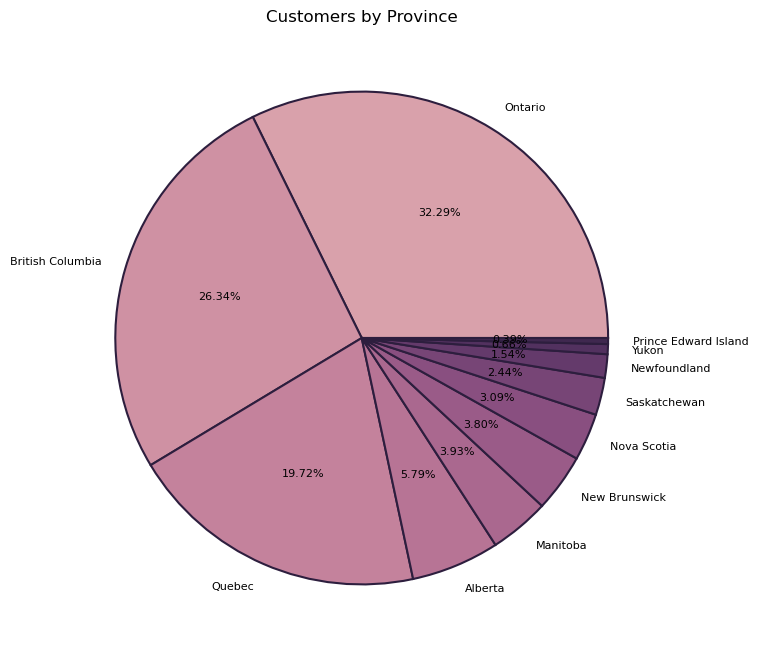

In [197]:
plt.figure(figsize=(8, 8))

plt.pie(df_customer_by_province['Loyalty Number'], labels=df_customer_by_province['Province'], autopct='%1.2f%%',colors=color_cube, textprops={'fontsize': 8}, wedgeprops={'edgecolor':color_cube[11], 'linewidth':1.5})

plt.title('Customers by Province')

plt.show()

In [51]:
#CONCLUSION: 

# Las tres provincias con mayor número de clientes son Ontario, British Columbia y Quebec. Como puede apreciarse en el gráfico de tarta, más del 60% de la totalidad
# de clientes son de alguna de estas tres provincias, siendo Ontaria la predominante. 

# 4. Compara el salario promedio por nivel educativo.


In [77]:
# En este caso, voy a utilizar el df_merged ya que contiene la columna de Salario ya limpia (sin valores negativos y sin nulos)

df_salary_by_education = df_merged.groupby('Education')['Salary'].mean().reset_index().sort_values(by = 'Salary', ascending = False).round()
df_salary_by_education


,Education,Salary
2,Doctor,178404.0
4,Master,103735.0
1,College,79451.0
0,Bachelor,72680.0
3,High School or Below,61184.0


In [78]:
salary_mean=df_merged['Salary'].mean()
print(f"El salario promedio es: {salary_mean}")

El salario promedio es: 79444.01747748541


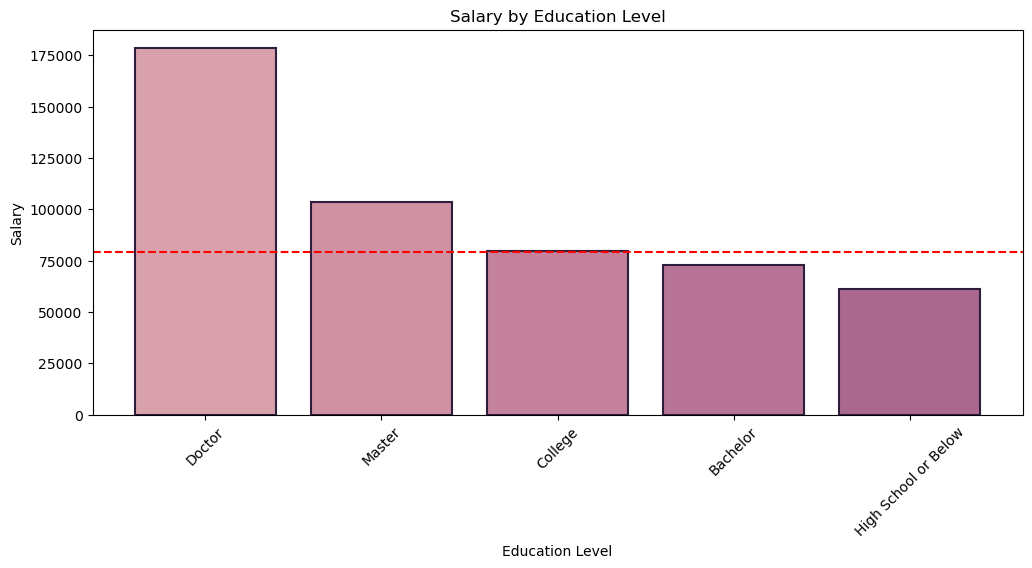

In [198]:
plt.figure(figsize=(12, 5))

colors = sns.color_palette("pastel")
plt.bar(x=df_salary_by_education['Education'], height=df_salary_by_education['Salary'], color=color_cube, edgecolor=color_cube[11], linewidth=1.5)
plt.axhline(y=salary_mean, color='red', linestyle='--', label=f'Media: {salary_mean}')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary by Education Level')
plt.xticks(rotation=45)

plt.show()

In [ ]:
#CONCLUSION: 

# A mayor nivel de estudios, mayor salario promedio. Tal y como vemos en la gráfica, los clientes que tienen nivel de educación 
# Doctor y Master tienen salarios por encima del salario medio, mientras que los de Bachelor y High School tienen salarios 
# por debajo del promedio. 


# 5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?


In [81]:
customers_by_loyalty_card = df_loyalty_history['Loyalty Card'].value_counts(normalize=True) * 100
print(customers_by_loyalty_card)

categorias = customers_by_loyalty_card.index

Loyalty Card
Star      45.629444
Nova      33.883014
Aurora    20.487543
Name: proportion, dtype: float64


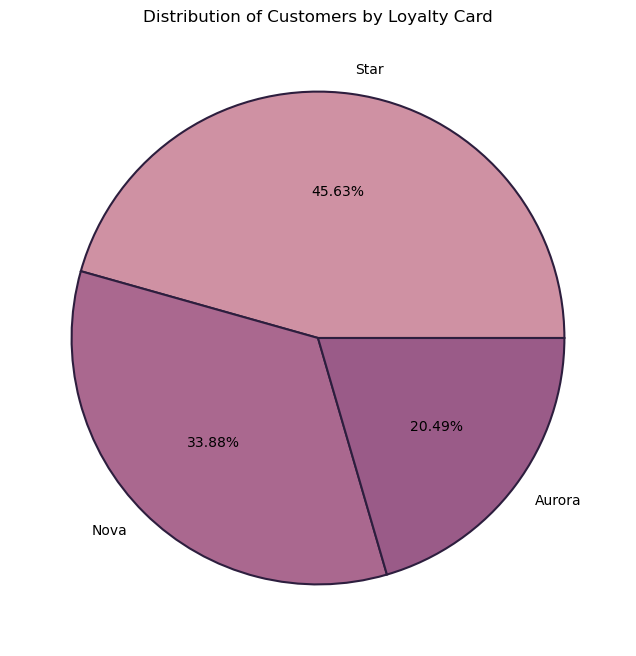

In [194]:
plt.figure(figsize=(8, 8))

plt.pie(customers_by_loyalty_card, labels=categorias, autopct='%1.2f%%',colors=[color_cube[1], color_cube[4], color_cube[5]], wedgeprops={'edgecolor':color_cube[11], 'linewidth':1.5})

plt.title("Distribution of Customers by Loyalty Card")
plt.show()

In [ ]:
#CONCLUSION

#Existen tres tipos de tarjetas de fidelidad: Star, Nova y Aurora. 
#El 45% de clientes tienen la tarjeta Star, el 33% la Nova y el 20% la Aurora

# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? 

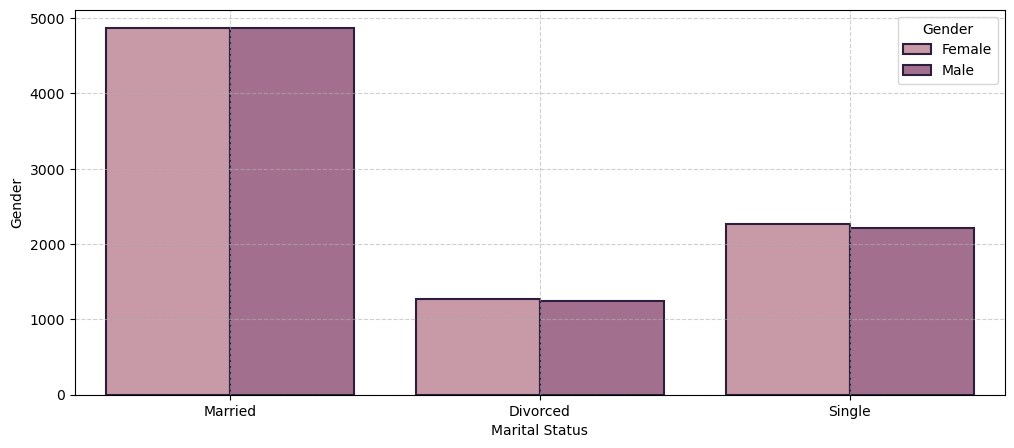

In [202]:
plt.figure(figsize=(12, 5))

sns.countplot(x='Marital Status', data=df_loyalty_history, palette=[color_cube[1], color_cube[4]], edgecolor=color_cube[11], linewidth=1.5, hue = 'Gender')


plt.xlabel("Marital Status")
plt.ylabel("Gender")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [ ]:
#CONCLUSION: 

# Vemos que la mayoría de clientes son casados, en segundo lugar solteros y el tercer lugar divorciados. 
# La distribución entre hombres y mujeres es muy similar en los tres grupos, siendo prácticamente el 50% mujeres y el otro 50% hombres. 
# No hay una diferencia notable en la composición por género de nuestros clientes. 